In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
def clean_text(str):
    s = result = ''.join([i for i in archivo[20:] if not i.isdigit()])
    t = s.replace('_curves.txt', '')
    u = t.replace('+', '')
    u = u.replace('-', '')
    if 'KsJs' in u:
        u = u.replace('KsJs', 'Ks Js')
    if u[0] == '_':
        u = u[1:]
    if 'AB' in u:
        u = u.replace('AB', '')
    return u

In [3]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def textcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    y = str(x.split('  ')[2])
    z = y.replace("'", "")
    return z

In [4]:
# Function is created in order to eliminate characters which are not Printable ASCII characters that appear 
# from the data transfer from repository
def numcleaner(str1):
    w = str(str1).split('\n')[0]
    x = str(w)
    x.split('  ')
    if ' NaN' in x:
        y = str(x.split('  ')[1])
        z = y.replace("'", "")
        a = z.replace(" ", "")
        return a
    else:
        w = str(str1).split('\n')[0]
        x = str(w)
        y = str(x.split('  ')[2])
        z = y.replace("'", "")
        return z

In [5]:
x1 = pd.read_csv('/Users/kmanj/Manjavacas Research/Metchev_2015/Metchev2015/2M1507_fitout02_ch2.txt',sep='\t',header=None, comment="#")
x2 = pd.read_csv('/Users/kmanj/Manjavacas Research/Metchev_2015/Metchev2015/2M1507_fitout08.txt',sep='\t',header=None, comment="#")
x3 = pd.read_csv('/Users/kmanj/Manjavacas Research/Metchev_2015/Metchev2015/SDSS1043_fitout02b.txt',sep='\t',header=None, comment="#")
x4 = pd.read_csv('/Users/kmanj/Manjavacas Research/Metchev_2015/Metchev2015/SDSS1043_fitout06c.txt',sep='\t',header=None, comment="#")

In [6]:
#repository like the one we have online
general_data = pd.read_csv('/Users/kmanj/FITS_BD_Files/Repository_Data/Repository.csv', encoding ='latin1')

In [7]:
new_name = ['J1507-16', 'J1507-16', 'J1043+12', 'J1043+12']

In [8]:
#plt.scatter(y2['Time'], y2['Flux'])

In [9]:
dir_save = '/Users/kmanj/FITS_BD_Files/Data/Metchev_2015/Special/'

In [10]:
Reference = 'Metchev et al 2015 ApJ 799 154'
Instrument = 'Infrared Array Camera'
Date_obs = 'Published January 27, 2015'
Band_obs_1 = 'Ch1' ##This needs to be figured out 
Band_obs_2 = 'Ch2'

In [11]:
Object = []
SpectralType = []
Jmag = []
Hmag = []
Kmag = []
RA = []
Dec = []
dJmag = []
dHmag = []
dKmag = []


for i in range(len(new_name)): 
    Object.append(textcleaner(general_data['Name'][general_data['Name_file'] == new_name[i]]))
    SpectralType.append(textcleaner(general_data['SpT '][general_data['Name_file'] == new_name[i]]))
    Jmag.append(textcleaner(general_data['J'][general_data['Name_file'] == new_name[i]]))
    dJmag.append(numcleaner(general_data['dJ'][general_data['Name_file'] == new_name[i]]))
    Hmag.append(numcleaner(general_data['H'][general_data['Name_file'] == new_name[i]]))
    dHmag.append(numcleaner(general_data['dH'][general_data['Name_file'] == new_name[i]]))
    Kmag.append(numcleaner(general_data['K'][general_data['Name_file'] == new_name[i]]))
    dKmag.append(numcleaner(general_data['dK'][general_data['Name_file'] == new_name[i]]))
    RA.append(textcleaner(general_data['RA'][general_data['Name_file'] == new_name[i]]))
    Dec.append(textcleaner(general_data['DEC'][general_data['Name_file'] == new_name[i]]))

In [12]:
Object

['2MASSW J1507476-162738',
 '2MASSW J1507476-162738',
 '2MASS J10433508+1213149',
 '2MASS J10433508+1213149']

In [16]:
l1 = x2[3]

sum1 = 0
for i in l1:
    sum1 += i
avg = sum1 / len(l1)

p = []
for i in l1:
    p.append(i / avg)

In [17]:
p

[1.0029408074678778,
 1.0020920504343511,
 1.0041807751581404,
 1.002693324204595,
 1.0026142316152984,
 1.002697576494342,
 1.002355692398673,
 1.0016336535996107,
 1.0015162904025898,
 1.0008444286225437,
 1.001736559011491,
 1.0011531448581852,
 1.0028804249534686,
 1.0030403110479607,
 1.004813515872513,
 1.002665259092264,
 1.0010876595960794,
 1.000903110221054,
 1.0011803595125668,
 0.9997422351200882,
 1.0022153668370177,
 0.9991911383688604,
 0.9996316755866627,
 0.9996733480261847,
 1.0011769576807692,
 1.0045294629174049,
 1.0019865936486223,
 1.0012713585131554,
 1.0020707889856155,
 1.0016549150483463,
 1.003340522704108,
 1.0016838306186266,
 1.005482826278711,
 1.0032223090491377,
 1.004713161834481,
 1.0034451290318873,
 1.0025946710824616,
 1.002501120708025,
 1.006723644426923,
 1.002367598809965,
 1.0042896337756668,
 1.0036033142104805,
 1.0035871555094413,
 1.0005289087233067,
 1.0027120342794822,
 1.0024960179603282,
 1.0034238675831517,
 1.0024211776607788,
 1.00

In [18]:
y1 = pd.DataFrame()
y2 = pd.DataFrame()
y3 = pd.DataFrame()
y4 = pd.DataFrame()
          
y1['Time'] = x1[0]
y1['Flux'] = x1[3] #Takes the nomralized corrected flux

y2['Time'] = x2[0]
y2['Flux'] = p

y3['Time'] = x3[0]
y3['Flux'] = x3[3]

y4['Time'] = x4[0]
y4['Flux'] = x4[3]

In [19]:
y2

,Time,Flux
0,0.020497,1.002941
1,0.056911,1.002092
2,0.093292,1.004181
3,0.129685,1.002693
4,0.166078,1.002614
...,...,...
319,11.658836,1.000491
320,11.695206,0.999207
321,11.731608,0.998562
322,11.768001,0.997317


In [20]:
z1 = "{}{}_ch1".format(dir_save,Object[0])
z2 = "{}{}_ch2".format(dir_save,Object[1])
z3 = "{}{}_ch2".format(dir_save,Object[2])
z4 = "{}{}_ch1".format(dir_save,Object[3])

<Axes: xlabel='Time [JD]', ylabel='Flux'>

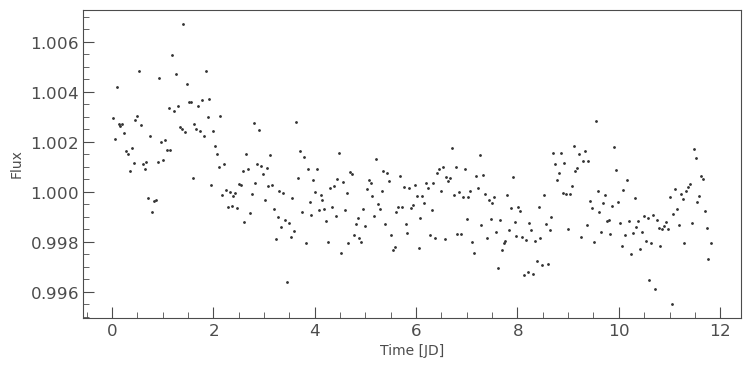

In [24]:
lc = l.LightCurve(time = y2['Time'], flux = list(p) * u.dimensionless_unscaled)
lc.scatter()

In [25]:
lc.to_fits(path = "C:/Users/kmanj/FITS_BD_Files/VarAmpResults/2MASSW J1507476-162738_ch1_Metc2015.fits")

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002561E961930>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002561E960AF0>]

In [26]:
with fits.open("C:/Users/kmanj/FITS_BD_Files/VarAmpResults/2MASSW J1507476-162738_ch1_Metc2015.fits", mode = 'update') as f:
    f[0].header['OBJECT'] = Object[0]
    f[0].header['SPECTYPE'] = SpectralType[0]
    f[0].header['DATE_OBS'] = Date_obs 
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = 226.948709
    f[0].header['DEC_OBJ'] = -16.460722
    f[1].header['EXTNAME'] = 'LIGHTCURVE'
    f[0].header['JMAG'] = f'{Jmag[0]} +/- {dJmag[0]}'
    f[0].header['HMAG'] = f'{Hmag[0]} +/- {dHmag[0]}'
    f[0].header['KMAG'] = f'{Kmag[0]} +/- {dKmag[0]}'
    f[1].header['TUNIT1'] = 'Hrs'

In [34]:
lc = l.LightCurve(time = list(x1[0]), flux = list(x1[3]) * u.dimensionless_unscaled)
lc.to_fits(path = z2 + '_Metc2015.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002B281E81990>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002B281E81A80>]

In [35]:
with fits.open(z2 + '_Metc2015.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[1]
    f[0].header['SPECTYPE'] = SpectralType[1]
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = 226.948709
    f[0].header['DEC_OBJ'] = -16.460722
    f[1].header['EXTNAME'] = 'LIGHTCURVE'
    f[0].header['JMAG'] = f'{Jmag[1]} +/- {dJmag[1]}'
    f[0].header['HMAG'] = f'{Hmag[1]} +/- {dHmag[1]}'
    f[0].header['KMAG'] = f'{Kmag[1]} +/- {dKmag[1]}'
    f[1].header['TUNIT1'] = 'Hrs'

In [36]:
lc = l.LightCurve(time = list(x4[0]), flux = list(x4[3]) * u.dimensionless_unscaled)
lc.to_fits(path = z4 + '_Metc2015.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002B281E81510>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002B281E5F0D0>]

In [37]:
with fits.open(z4 + '_Metc2015.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[2]
    f[0].header['SPECTYPE'] = SpectralType[2]
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = 160.896165
    f[0].header['DEC_OBJ'] = 12.220806
    f[1].header['EXTNAME'] = 'LIGHTCURVE'
    f[0].header['JMAG'] = f'{Jmag[2]} +/- {dJmag[2]}'
    f[0].header['HMAG'] = f'{Hmag[2]} +/- {dHmag[2]}'
    f[0].header['KMAG'] = f'{Kmag[2]} +/- {dKmag[2]}'
    f[1].header['TUNIT1'] = 'Hrs'
  

In [38]:
lc = l.LightCurve(time = list(x3[0]), flux = list(x3[3]) * u.dimensionless_unscaled)
lc.to_fits(path = z3 + '_Metc2015.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002B281E838E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002B281F102B0>]

In [39]:
with fits.open(z3 + '_Metc2015.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object[3]
    f[0].header['SPECTYPE'] = SpectralType[3]
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = 'Spitzer Space Telescope'
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = 160.896165
    f[0].header['DEC_OBJ'] = 12.220806
    f[1].header['EXTNAME'] = 'LIGHTCURVE'
    f[0].header['JMAG'] = f'{Jmag[3]} +/- {dJmag[3]}'
    f[0].header['HMAG'] = f'{Hmag[3]} +/- {dHmag[3]}'
    f[0].header['KMAG'] = f'{Kmag[3]} +/- {dKmag[3]}'
    f[1].header['TUNIT1'] = 'Hrs'